<a href="https://colab.research.google.com/github/infantpriya/infantpriya73/blob/main/SHAP_analysis_of_customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Mount the drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Step 2: Import Libraries

In [11]:
# Interpretable Churn Pipeline with SHAP
# Requirements: pandas, numpy, scikit-learn, xgboost, shap, matplotlib, seaborn, imbalanced-learn

# ==========================
# 2. IMPORT LIBRARIES
# ==========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import shap
shap.initjs()

Step 3: LOAD THE DATASET

In [12]:
# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/datasets/project_customer_churn_dataset.csv")

# Show first few rows
df.head()

,customer_id,age,gender,senior_citizen,partner,dependents,tenure_months,contract_type,internet_service,service_usage_gb,num_service_outages,avg_downtime_minutes,support_calls_last_3mo,billing_method,monthly_charges,total_charges,churn
0,CUST000000,63,Female,1,1,1,18,Month-to-month,DSL,11.990932,0,22.693883,1,Bank transfer,23.76,425.97,1
1,CUST000001,20,Male,0,0,0,12,One year,Fiber Optic,25.753202,0,27.559489,4,Bank transfer,62.86,738.33,0
2,CUST000002,46,Male,0,0,0,50,Month-to-month,DSL,35.038581,1,16.690725,5,Bank transfer,52.85,2409.27,0
3,CUST000003,52,Female,0,1,0,56,One year,DSL,19.116139,2,9.852139,2,Electronic check,39.20,2148.38,1
4,CUST000004,56,Male,0,1,0,71,Month-to-month,DSL,19.357500,1,11.499363,0,Credit card,40.20,2666.37,1


Step 4: BASIC DATASET INFORMATION

In [13]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics (Numerical Features):")
print(df.describe())



Dataset Shape: (2500, 17)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             2500 non-null   object 
 1   age                     2500 non-null   int64  
 2   gender                  2500 non-null   object 
 3   senior_citizen          2500 non-null   int64  
 4   partner                 2500 non-null   int64  
 5   dependents              2500 non-null   int64  
 6   tenure_months           2500 non-null   int64  
 7   contract_type           2500 non-null   object 
 8   internet_service        2106 non-null   object 
 9   service_usage_gb        2500 non-null   float64
 10  num_service_outages     2500 non-null   int64  
 11  avg_downtime_minutes    2500 non-null   float64
 12  support_calls_last_3mo  2500 non-null   int64  
 13  billing_method          2500 non-null   object 
 14 

shape → number of rows & columns

info() → datatypes & nulls

describe() → mean, std, min, max, percentiles

Step 5: CHECK MISSING VALUES

In [14]:
df.isnull().sum()


,0
customer_id,0
age,0
gender,0
senior_citizen,0
partner,0
dependents,0
tenure_months,0
contract_type,0
internet_service,394
service_usage_gb,0


If we want to handle missing values:

In [17]:
df = df.fillna(df.mean(numeric_only=True))


Step 6: ENCODE CATEGORICAL VARIABLES

In [16]:
# LabelEncoder for binary labels (Yes/No categories)
le = LabelEncoder()

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


Converts string categories to numbers because machine learning models require numeric data.

yes/no → 1/0

contract types → 0/1/2

Step 7: DEFINE FEATURES (X) AND TARGET (y)

In [18]:
X = df.drop("churn", axis=1)
y = df["churn"]


Step 8: TRAIN–TEST SPLIT

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



*   80% training, 20% testing
*   stratify=y keeps churn distribution balanced

Step 9: TRAIN A RANDOM FOREST MODEL

In [20]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

Step 10: MODEL EVALUATION

In [21]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.638

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       298
           1       0.55      0.53      0.54       202

    accuracy                           0.64       500
   macro avg       0.62      0.62      0.62       500
weighted avg       0.64      0.64      0.64       500



Step 11: FEATURE IMPORTANCE VISUALIZATION

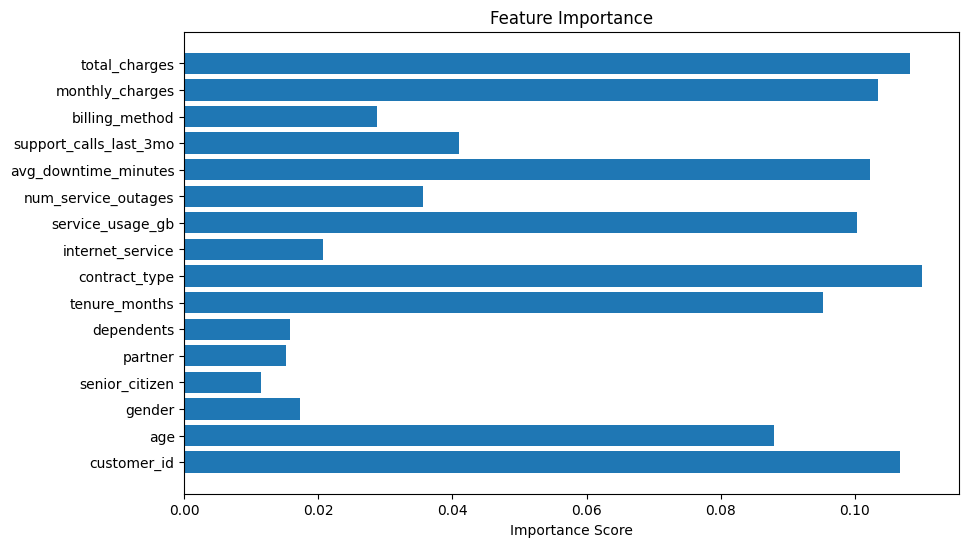

In [22]:
importances = model.feature_importances_
plt.figure(figsize=(10,6))
plt.barh(X.columns, importances)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.show()


Step 12: SHAP EXPLAINABILITY (GLOBAL + LOCAL)


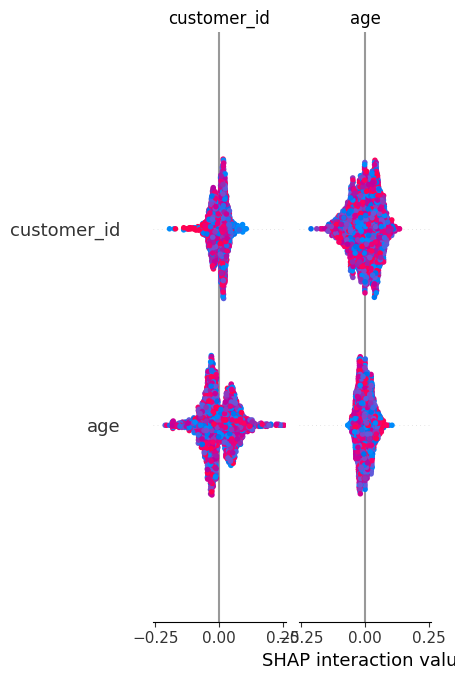

In [27]:
#Create SHAP Explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)


# Case 1: shap_values is a list (binary classification → 2 classes)
if isinstance(shap_values, list):
    shap_to_use = shap_values[1]   # class 1 = churn
else:
    # Case 2: shap_values is a single matrix
    shap_to_use = shap_values


#Global Feature Importance (SHAP Summary Plot)

shap.summary_plot(shap_to_use, X_train)


In [32]:
#Local Explanation for One Customer
if isinstance(shap_values, list):
    # Binary classification → two outputs → use class 1 (Churn)
    expected = explainer.expected_value[1]
    shap_val = shap_values[1][0]
else:
    # Single output → no class indexing
    expected = explainer.expected_value
    shap_val = shap_values[0]

# Pick a sample
sample = X_test.iloc[0]


Step 13: PREDICT CHURN FOR A NEW CUSTOMER

In [33]:
new_customer = X.sample(1)      # Using a random customer from dataset
prediction = model.predict(new_customer)
probability = model.predict_proba(new_customer)

print("Prediction (1 = churn):", prediction[0])
print("Churn Probability:", probability[0][1])


Prediction (1 = churn): 0
Churn Probability: 0.165
